In [2]:
import matplotlib.pyplot as plt

In [9]:
def train_val_plot(train_results, val_results, title):  
    plt.plot(list(range(len(train_results))), train_results, color='blue', label='train')
    plt.plot(list(range(len(val_results))), val_results, color='orange', label='valid')
    plt.title(title)
    plt.ylabel("accuracy")
    plt.xlabel("no epochs")
    plt.ylim((0.5, 1))
    plt.legend()

# Results

1. Learning rate and batch size

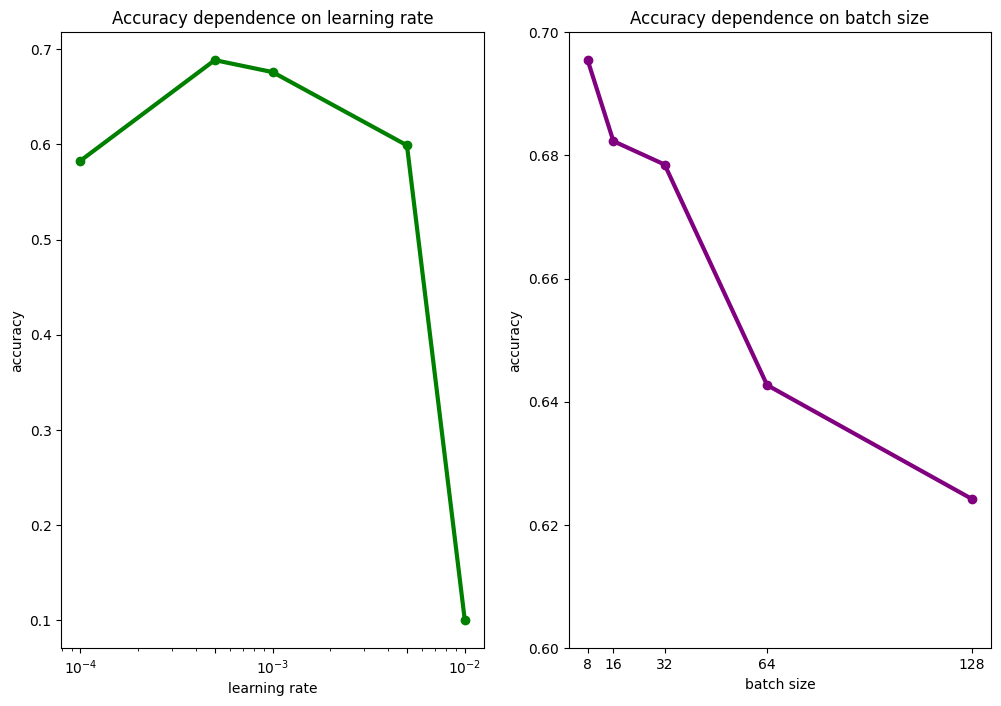

In [64]:
param_grid = {'learning_rate': [0.0001, 0.0005, 0.001, 0.005, 0.01], 'batch_size': [8, 16, 32, 64, 128]}
learning_rate = [0.583, 0.6887, 0.6761, 0.5991, 0.1]
batch_size = [0.6954, 0.6823, 0.6785, 0.6427, 0.6242]

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].plot(param_grid['learning_rate'], learning_rate, color='green', marker='o', linewidth=3)
ax[0].set_title("Accuracy dependence on learning rate")
ax[0].set_xlabel("learning rate")
ax[0].set_ylabel("accuracy")
ax[0].set_xscale("log")
ax[0].set_xticks(param_grid['learning_rate'])
ax[1].plot(param_grid['batch_size'], batch_size, color='purple', marker = 'o', linewidth=3)
ax[1].set_title("Accuracy dependence on batch size")
ax[1].set_xlabel("batch size")
ax[1].set_ylabel("accuracy")
ax[1].set_ylim((0.6, 0.7))
ax[1].set_xticks(param_grid['batch_size'])
plt.show()

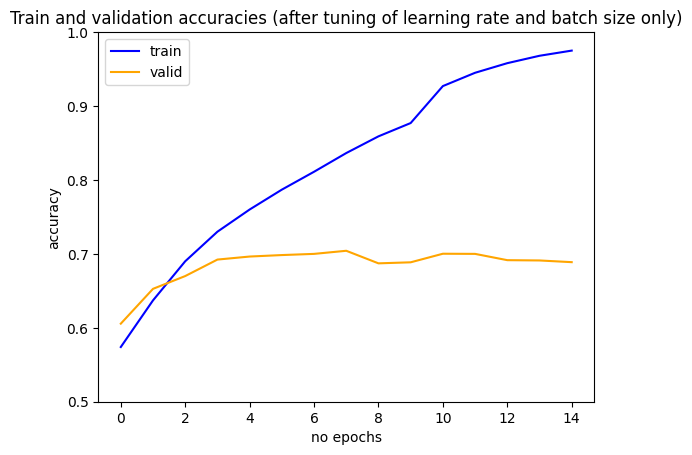

In [11]:
train = [0.574, 0.6371, 0.69, 0.73, 0.76, 0.7869, 0.8111, 0.8364, 0.859, 0.877, 0.927, 0.945, 0.958, 0.968, 0.975 ]
val = [0.6056, 0.6527, 0.67, 0.6923, 0.6964, 0.6984, 0.7, 0.7042, 0.6872, 0.6886, 0.7002, 0.7, 0.6915, 0.6911, 0.6888]
title = "Train and validation accuracies (after tuning of learning rate and batch size only)"
train_val_plot(train, val, title)

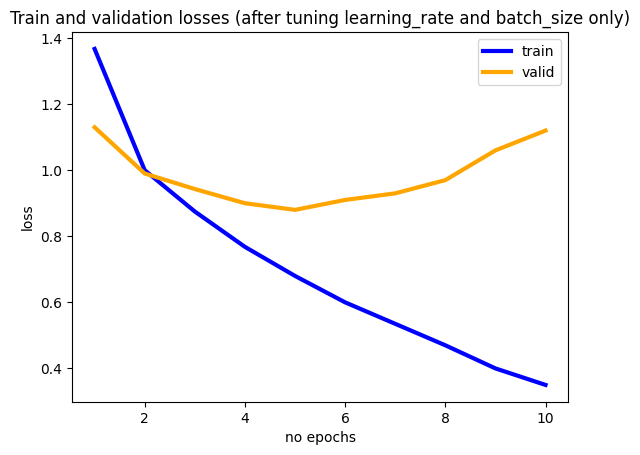

In [63]:
train_loss = [1.3672, 1, 0.875, 0.768, 0.68, 0.6, 0.535, 0.47, 0.4, 0.35]
val_loss =  [1.13, 0.99, 0.943, 0.9, 0.88, 0.91, 0.93, 0.97, 1.06, 1.12]
plt.plot(list(range(1, 11)), train_loss, color='blue', label='train', linewidth=3)
plt.plot(list(range(1, 11)), val_loss, color='orange', label='valid', linewidth=3)
plt.title("Train and validation losses (after tuning learning_rate and batch_size only)")
plt.ylabel("loss")
plt.xlabel("no epochs")
plt.legend()

2. Dropout and decay

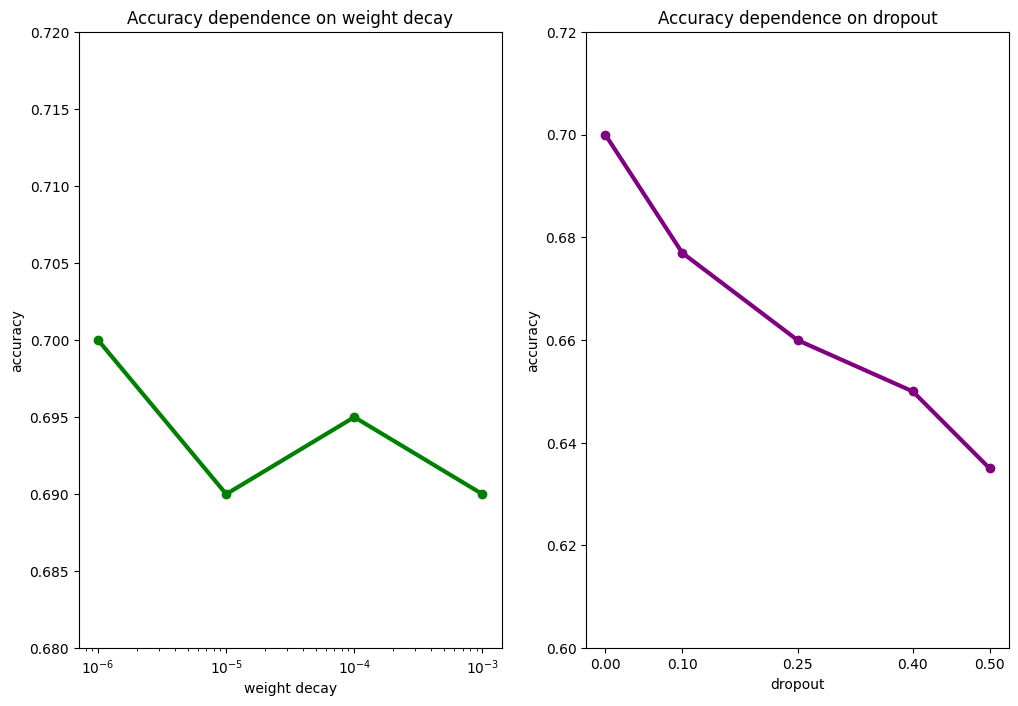

In [62]:
dr = [0, 0.1, 0.25, 0.4, 0.5]
wd = [1e-6, 1e-5, 1e-4, 1e-3]
dropout = [0.7, 0.677, 0.66, 0.65, 0.635]
decay = [0.7, 0.69, 0.695, 0.69]

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].plot(wd, decay,  marker='o', color='green', linewidth=3)
ax[0].set_title("Accuracy dependence on weight decay")
ax[0].set_xlabel("weight decay")
ax[0].set_ylabel("accuracy")
ax[0].set_xscale("log")
ax[0].set_ylim((0.68, 0.72))
ax[0].set_xticks(wd)
ax[1].plot(dr, dropout, marker = 'o', color='purple', linewidth=3)
ax[1].set_title("Accuracy dependence on dropout")
ax[1].set_xlabel("dropout")
ax[1].set_ylabel("accuracy")
ax[1].set_ylim((0.6, 0.72))
ax[1].set_xticks(dr)
plt.show()

3. Architecture

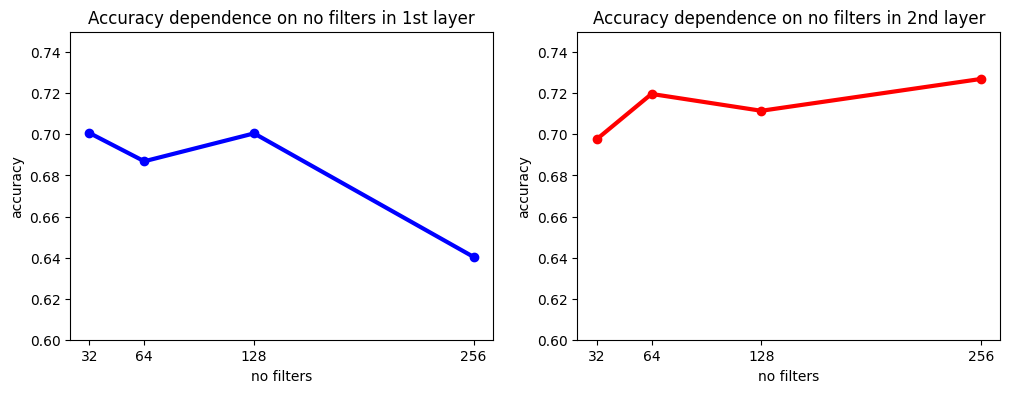

In [60]:
filter0 = [0.7007, 0.6869, 0.7005, 0.6403]
filter1 = [0.6976, 0.7197, 0.7115, 0.727]
param_grid = {'number_of_filters0': [32, 64, 128, 256], 'number_of_filters1': [32, 64, 128, 256]}

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(param_grid['number_of_filters0'], filter0, marker='o', color='blue', linewidth=3)
ax[0].set_title("Accuracy dependence on no filters in 1st layer")
ax[0].set_xlabel("no filters")
ax[0].set_ylabel("accuracy")
ax[0].set_ylim((0.6, 0.75))
ax[0].set_xticks(param_grid['number_of_filters1'])
ax[1].plot(param_grid['number_of_filters1'], filter1, marker='o', color='red', linewidth=3)
ax[1].set_title("Accuracy dependence on no filters in 2nd layer")
ax[1].set_xlabel("no filters")
ax[1].set_ylabel("accuracy")
ax[1].set_ylim((0.6, 0.75))
ax[1].set_xticks(param_grid['number_of_filters0'])
plt.show()

(0.7, 0.75)

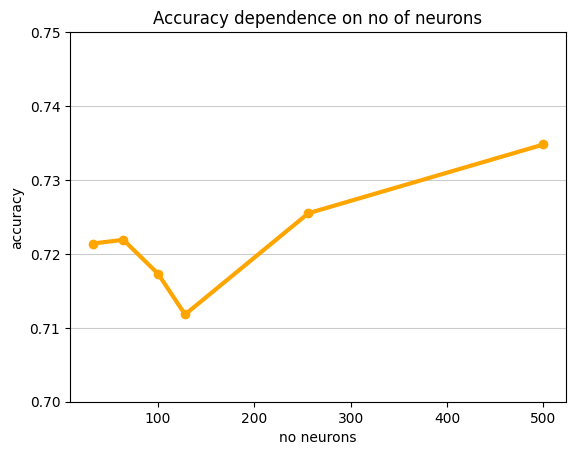

In [59]:
neurons = [0.7214, 0.7219, 0.7173, 0.7118, 0.7255, 0.7348]
plt.plot([32, 64, 100, 128, 256, 500], neurons, color='orange', label='neurons', marker='o', linewidth=3)
plt.title("Accuracy dependence on no of neurons")
plt.ylabel("accuracy")
plt.xlabel("no neurons")
plt.grid(axis='y', c='black', alpha=0.2)
plt.ylim((0.7, 0.75))

Accuracy gains of every parameter


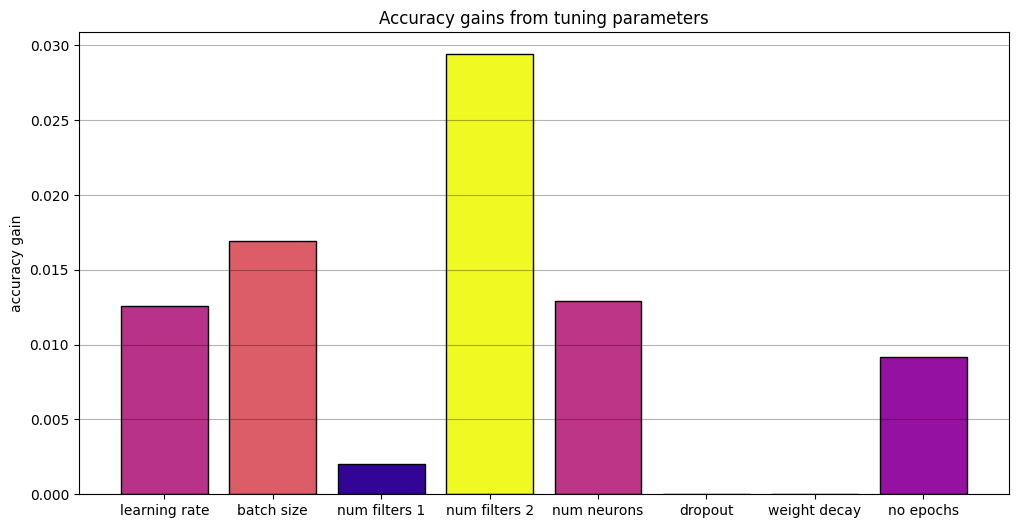

In [79]:
import numpy as np

labels = ['learning rate', 'batch size', 'num filters 1', 'num filters 2', 'num neurons', 'dropout', 'weight decay', 'no epochs']
values = np.array([0.6887 - 0.6761, 0.6954 - 0.6785, 0.002, 0.727 - 0.6976, 0.7348 - 0.7219, 0, 0, 0.744 - 0.7348])
cmap = plt.get_cmap('plasma')

colors = cmap(values / max(values))
plt.figure(figsize=(12, 6))
plt.bar(labels, values, color= colors, edgecolor='black')
plt.grid(axis='y', alpha=0.3, color='black')
plt.title('Accuracy gains from tuning parameters')
plt.ylabel('accuracy gain')
plt.show()

4. Results after tuning all parameters

In [35]:
train_acc = [0.577, 0.73, 0.82, 0.9, 0.95, 0.97, 0.975, 0.993, 0.996]
train_loss = [1.8, 0.76, 0.51, 0.286, 0.15, 0.1, 0.07, 0.02, 0.012]
val_acc = [0.675, 0.6957, 0.736, 0.74, 0.735, 0.7353, 0.7318, 0.744, 0.7378]
val_loss = [0.93, 0.89, 0.794, 0.895, 1.01, 1.23, 1.446, 1.564, 1.649]

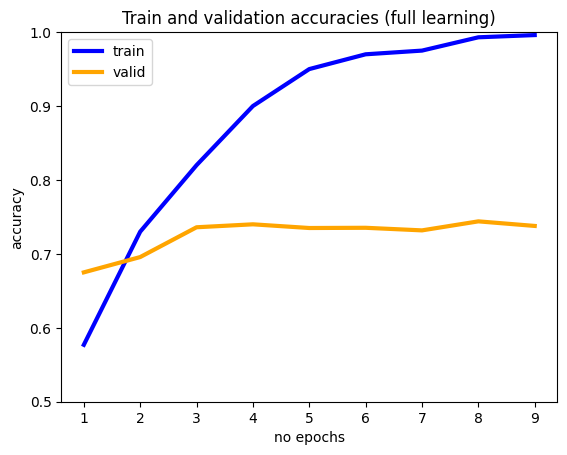

In [39]:
plt.plot(list(range(1, 10)), train_acc, color='blue', label='train', linewidth=3)
plt.plot(list(range(1, 10)), val_acc, color='orange', label='valid', linewidth=3)
plt.title("Train and validation accuracies (full learning)")
plt.ylabel("accuracy")
plt.xlabel("no epochs")
plt.ylim((0.5, 1))
plt.legend()

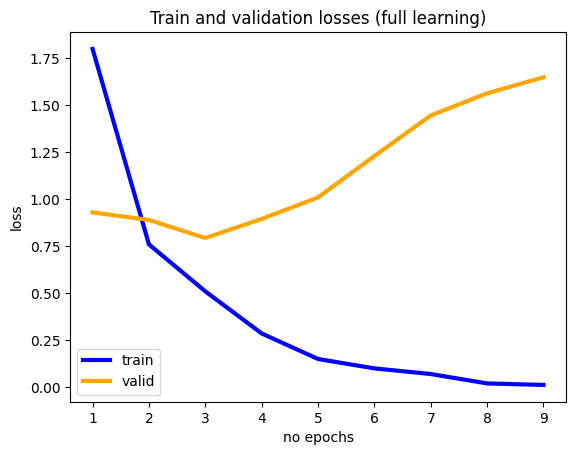

In [40]:
plt.plot(list(range(1, 10)), train_loss, color='blue', label='train', linewidth=3)
plt.plot(list(range(1, 10)), val_loss, color='orange', label='valid', linewidth=3)
plt.title("Train and validation losses (full learning)")
plt.ylabel("loss")
plt.xlabel("no epochs")
plt.legend()

Adding dropout and decay

In [41]:
train_acc = [0.52, 0.66, 0.72, 0.76, 0.796, 0.825, 0.85, 0.87, 0.883, 0.89, 0.94, 0.952, 0.96, 0.96095, 0.964]  
train_loss = [1.32, 0.95, 0.797, 0.68, 0.58, 0.495, 0.426, 0.366, 0.33, 0.3, 0.175, 0.14, 0.12, 0.116, 0.11]
val_acc = [0.62, 0.67, 0.699, 0.715, 0.708, 0.713, 0.719, 0.7076, 0.7151, 0.71, 0.7298, 0.7347, 0.7357, 0.7335, 0.7268]
val_loss = [1.07, 0.93, 0.886, 0.823, 0.863, 0.885, 0.897, 0.968, 0.955, 1.05, 1.04, 1.06, 1.1, 1.14, 1.18]

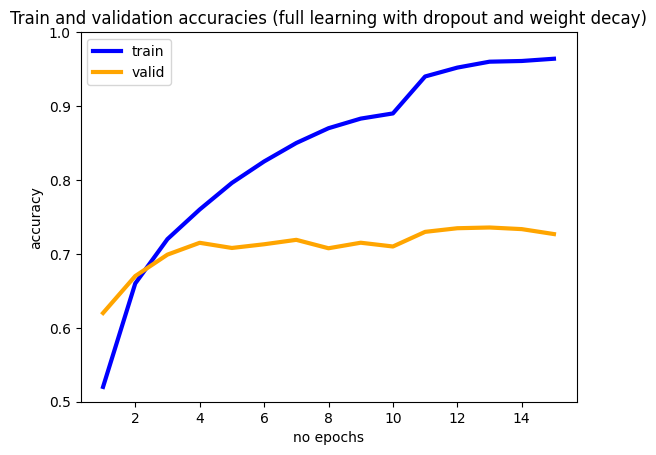

In [42]:
plt.plot(list(range(1, 16)), train_acc, color='blue', label='train', linewidth=3)
plt.plot(list(range(1, 16)), val_acc, color='orange', label='valid', linewidth=3)
plt.title("Train and validation accuracies (full learning with dropout and weight decay)")
plt.ylabel("accuracy")
plt.xlabel("no epochs")
plt.ylim((0.5, 1))
plt.legend()

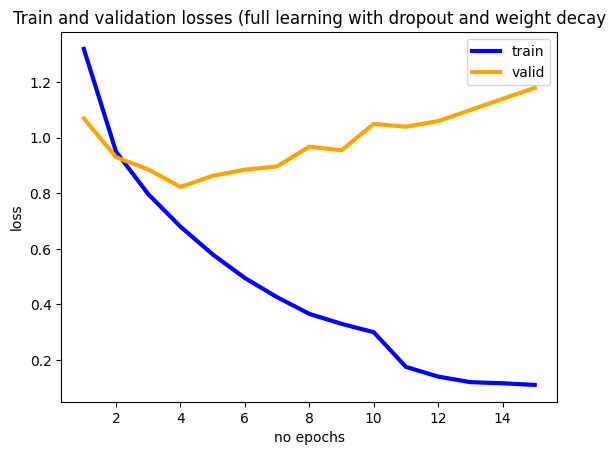

In [44]:
plt.plot(list(range(1, 16)), train_loss, color='blue', label='train', linewidth=3)
plt.plot(list(range(1, 16)), val_loss, color='orange', label='valid', linewidth=3)
plt.title("Train and validation losses (full learning with dropout and weight decay")
plt.ylabel("loss")
plt.xlabel("no epochs")
plt.legend()

# Augmentation

Basic augmentation

In [45]:
train_acc = [0.4328, 0.54, 0.585, 0.6142, 0.635, 0.67, 0.69, 0.697, 0.71, 0.7113, 0.73, 0.74, 0.741, 0.745, 0.75]
train_loss = [1.56, 1.28, 1.16, 1.08, 1.02, 0.91, 0.88, 0.85, 0.83, 0.81, 0.76, 0.738, 0.728, 0.718, 0.7]
val_acc = [0.55, 0.6, 0.645, 0.668, 0.69, 0.7195, 0.717, 0.7288, 0.7295, 0.743, 0.75, 0.7554, 0.7525, 0.7597, 0.7616]
val_loss = [1.24, 1.1, 1, 0.94, 0.9, 0.815, 0.826, 0.812, 0.8, 0.77, 0.744, 0.738, 0.753, 0.728, 0.72468]

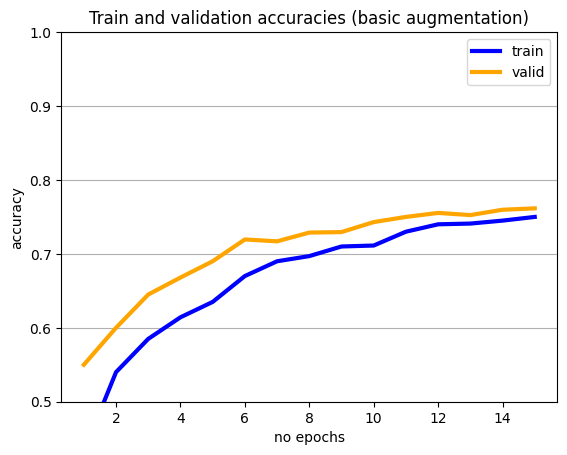

In [46]:
plt.plot(list(range(1, 16)), train_acc, color='blue', label='train', linewidth=3)
plt.plot(list(range(1, 16)), val_acc, color='orange', label='valid', linewidth=3)
plt.title("Train and validation accuracies (basic augmentation)")
plt.ylabel("accuracy")
plt.xlabel("no epochs")
plt.ylim((0.5, 1))
plt.grid(axis='y')
plt.legend()

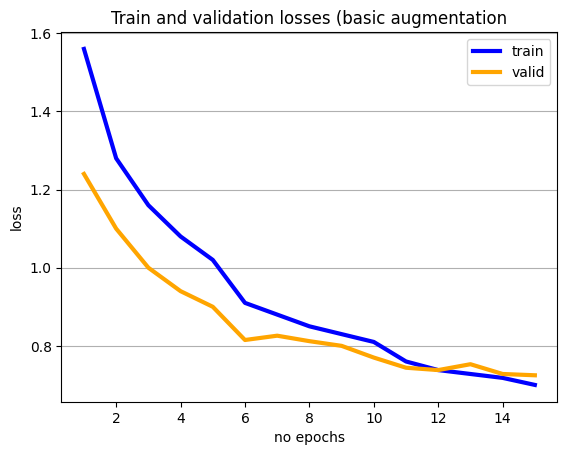

In [47]:
plt.plot(list(range(1, 16)), train_loss, color='blue', label='train', linewidth=3)
plt.plot(list(range(1, 16)), val_loss, color='orange', label='valid', linewidth=3)
plt.title("Train and validation losses (basic augmentation")
plt.ylabel("loss")
plt.xlabel("no epochs")
plt.grid(axis='y')
plt.legend()

Cutout

In [48]:
train_acc = [0.511, 0.657, 0.72, 0.78, 0.827, 0.867, 0.89, 0.917, 0.95, 0.967, 0.97, 0.977]
train_loss = [1.35, 0.96, 0.78, 0.62, 0.49, 0.37, 0.287, 0.23, 0.12, 0.09, 0.08, 0.06]
val_acc = [0.65, 0.69, 0.714, 0.73, 0.726, 0.723, 0.7274, 0.728, 0.7483, 0.74, 0.7443, 0.7433]
val_loss = [0.99, 0.86, 0.84, 0.8, 0.89, 0.97, 1, 1.14, 1.19, 1.27, 1.3, 1.37]

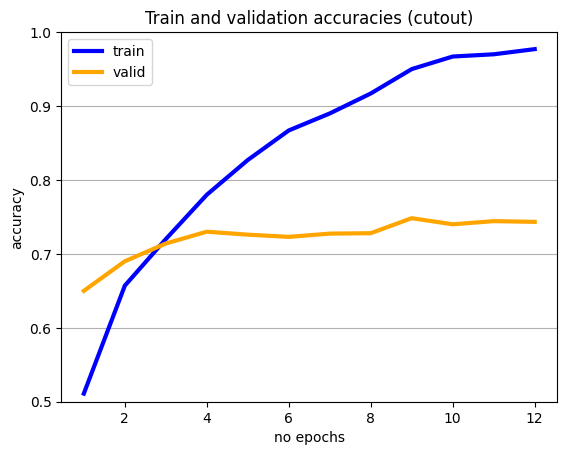

In [49]:
plt.plot(list(range(1, 13)), train_acc, color='blue', label='train', linewidth=3)
plt.plot(list(range(1, 13)), val_acc, color='orange', label='valid', linewidth=3)
plt.title("Train and validation accuracies (cutout)")
plt.ylabel("accuracy")
plt.xlabel("no epochs")
plt.ylim((0.5, 1))
plt.grid(axis='y')
plt.legend()

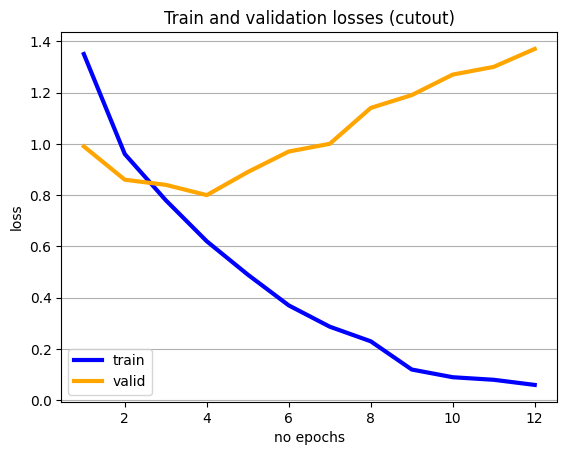

In [50]:
plt.plot(list(range(1, 13)), train_loss, color='blue', label='train', linewidth=3)
plt.plot(list(range(1, 13)), val_loss, color='orange', label='valid', linewidth=3)
plt.title("Train and validation losses (cutout)")
plt.ylabel("loss")
plt.xlabel("no epochs")
plt.grid(axis='y')
plt.legend()

Mixup ($\alpha=0.7$)

In [51]:
train_acc =[0.4, 0.53, 0.58, 0.61, 0.63, 0.646, 0.66, 0.67, 0.7, 0.71, 0.717, 0.721]
train_loss = [1.62, 1.3, 1.17, 1.1, 1.04, 1, 0.96, 0.93, 0.85, 0.83, 0.8, 0.79]
val_acc = [0.54, 0.61, 0.66, 0.6624, 0.7, 0.7164, 0.72, 0.7153, 0.7496, 0.7523, 0.7592, 0.7541]
val_loss = [1.24, 1.14, 0.99, 1.03, 0.85, 0.864, 0.86, 0.87, 0.7677, 0.75, 0.735, 0.76]

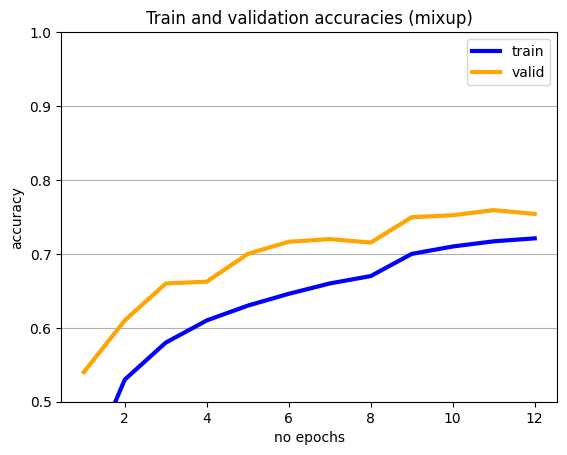

In [52]:
plt.plot(list(range(1, 13)), train_acc, color='blue', label='train', linewidth=3)
plt.plot(list(range(1, 13)), val_acc, color='orange', label='valid', linewidth=3)
plt.title("Train and validation accuracies (mixup)")
plt.ylabel("accuracy")
plt.xlabel("no epochs")
plt.ylim((0.5, 1))
plt.grid(axis='y')
plt.legend()

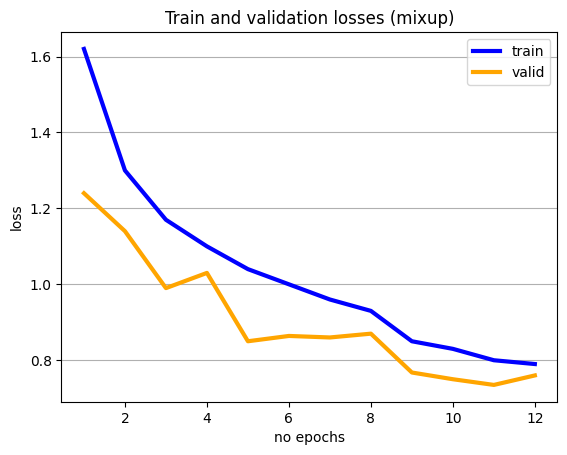

In [53]:
plt.plot(list(range(1, 13)), train_loss, color='blue', label='train', linewidth=3)
plt.plot(list(range(1, 13)), val_loss, color='orange', label='valid', linewidth=3)
plt.title("Train and validation losses (mixup)")
plt.ylabel("loss")
plt.xlabel("no epochs")
plt.grid(axis='y')
plt.legend()

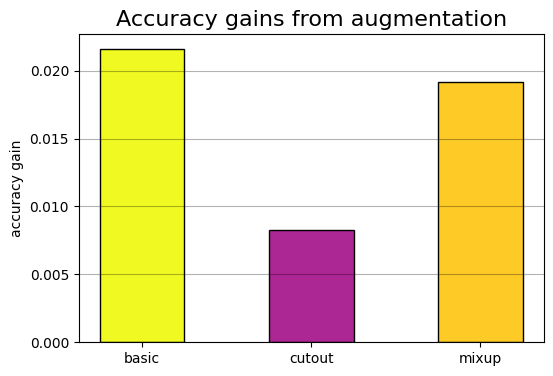

In [75]:
import numpy as np

labels = ['basic', 'cutout', 'mixup']
values = np.array([0.7616 - 0.740, 0.7483 - 0.740, 0.7592 - 0.740])
cmap = plt.get_cmap('plasma')

colors = cmap(values / max(values))
plt.figure(figsize=(6, 4))
plt.bar(labels, values, color= colors, edgecolor='black', width=0.5)
plt.grid(axis='y', alpha=0.3, color='black')
plt.title('Accuracy gains from augmentation', fontsize=16)
plt.ylabel('accuracy gain')
plt.show()